# Compréhension du jeu de données

## Features

In [8]:
import pandas as pd

features = pd.read_csv('alt_acsincome_ca_features_85.csv')
columns = features.columns
features

,AGEP,COW,SCHL,MAR,OCCP,POBP,RELP,WKHP,SEX,RAC1P
0,41.0,4.0,24.0,1.0,2555.0,6.0,1.0,60.0,2.0,1.0
1,77.0,7.0,22.0,1.0,4920.0,39.0,0.0,35.0,1.0,1.0
2,38.0,1.0,18.0,1.0,440.0,6.0,1.0,50.0,1.0,1.0
3,30.0,1.0,22.0,5.0,1555.0,6.0,2.0,80.0,1.0,6.0
4,36.0,1.0,16.0,1.0,4030.0,314.0,1.0,70.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...
166310,25.0,1.0,20.0,1.0,4720.0,6.0,7.0,8.0,2.0,1.0
166311,34.0,1.0,22.0,1.0,110.0,210.0,0.0,40.0,1.0,6.0
166312,54.0,3.0,18.0,1.0,7700.0,6.0,1.0,50.0,1.0,1.0
166313,39.0,1.0,16.0,5.0,9130.0,6.0,0.0,50.0,1.0,1.0


## Labels

In [9]:
labels = pd.read_csv('alt_acsincome_ca_labels_85.csv')
labels

,PINCP
0,True
1,True
2,False
3,True
4,False
...,...
166310,False
166311,True
166312,True
166313,True


## Explore dataset

In [10]:
len(features)

166315

In [11]:
len(features['AGEP'])

166315

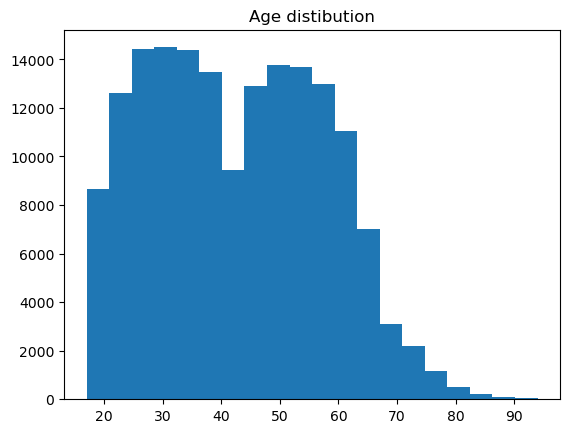

In [12]:
import matplotlib.pyplot as plt

plt.hist(features['AGEP'], bins=20)
plt.title("Age distibution");

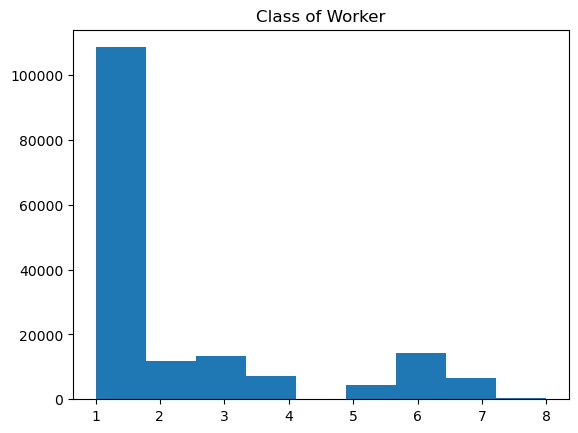

In [13]:
plt.hist(features['COW'], bins=9)
plt.title("Class of Worker");

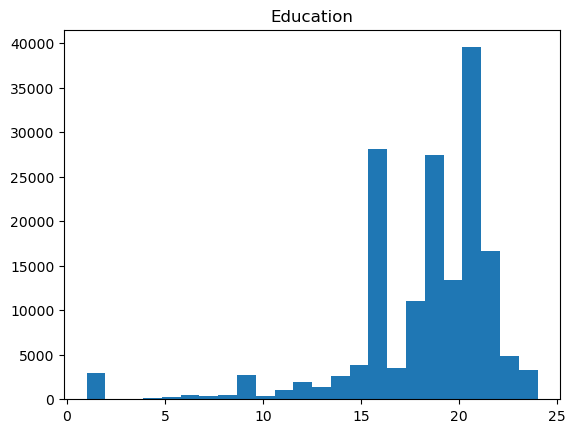

In [14]:
plt.hist(features['SCHL'], bins=24)
plt.title("Education");

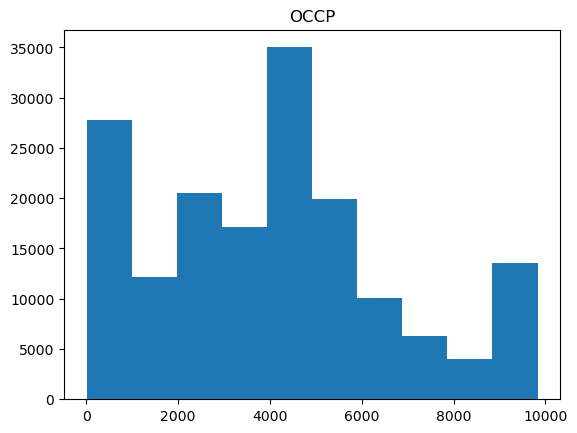

In [15]:
plt.hist(features['OCCP'])
plt.title("OCCP");

## Split train & test sets

In [16]:
import sklearn
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    features,
    labels,
    test_size=0.2,
    shuffle=True
)

In [18]:
print(f"X_train length: {len(X_train)}")
print(f"X_test length: {len(X_test)}")
print(f"y_train length: {len(y_train)}")
print(f"y_test length: {len(y_test)}")

X_train length: 133052
X_test length: 33263
y_train length: 133052
y_test length: 33263


## Data preparation

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.to_numpy())
X_train_scaled = pd.DataFrame(X_train_scaled, columns=columns)

X_test_scaled = scaler.transform(X_test.to_numpy())
X_test_scaled = pd.DataFrame(X_test_scaled, columns=columns)

## Save Scaler

In [20]:
import joblib

joblib.dump(scaler, 'scaler.joblib')

['scaler.joblib']

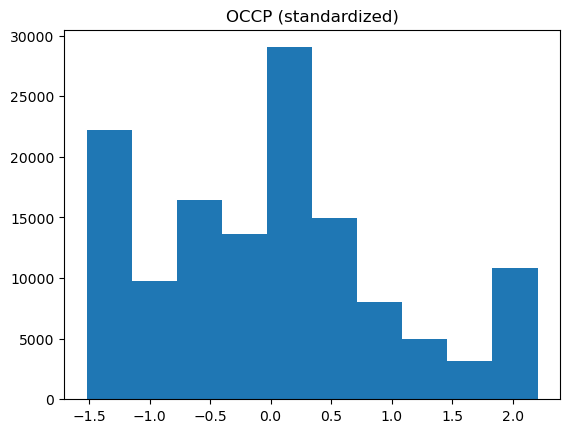

In [21]:
plt.hist(X_train_scaled['OCCP'])
plt.title("OCCP (standardized)");

## Recherche de bons modèles

In [22]:
from sklearn.ensemble import RandomForestClassifier, \
                             AdaBoostClassifier, \
                             GradientBoostingClassifier, \
                             StackingClassifier
                             
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.model_selection import cross_val_score

## Random Forest (default)

In [23]:
random_forest_default = RandomForestClassifier()
random_forest_default.fit(X_train_scaled, y_train)

/tmp/ipykernel_2697/309182599.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest_default.fit(X_train_scaled, y_train)


RandomForestClassifier()

In [24]:
val_scores = cross_val_score(random_forest_default, X_test_scaled, y_test, cv=5)

/home/aurelien/.anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/aurelien/.anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/aurelien/.anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/aurelien/.anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:

In [25]:
import numpy as np

print(val_scores)
np.mean(val_scores)

[0.80715467 0.80294604 0.81346761 0.81479254 0.80832832]


0.8093378361901671

In [26]:
y_pred = random_forest_default.predict(X_test_scaled)

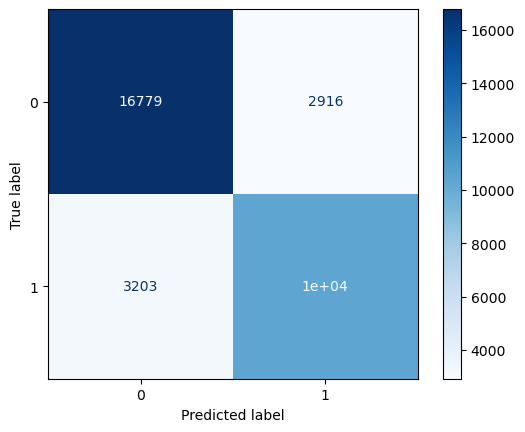

In [27]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues');

## AdaBoost (default)

In [28]:
adaboost_default = AdaBoostClassifier()
adaboost_default.fit(X_train_scaled, y_train)

/home/aurelien/.anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier()

In [29]:
val_scores = cross_val_score(adaboost_default, X_test_scaled, y_test, cv=5)

/home/aurelien/.anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/aurelien/.anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/aurelien/.anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/aurelien/.anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expec

In [30]:
print(val_scores)
np.mean(val_scores)

[0.80700436 0.8041485  0.8115136  0.81584486 0.80667468]


0.8090372018500827

In [31]:
y_pred = adaboost_default.predict(X_test_scaled)

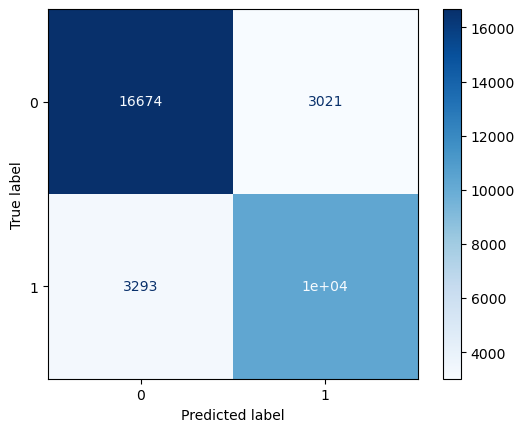

In [32]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues');

## Gradient Boosting (default)

In [33]:
gradient_boosting_default = GradientBoostingClassifier()
gradient_boosting_default.fit(X_train_scaled, y_train)

/home/aurelien/.anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier()

In [34]:
val_scores = cross_val_score(gradient_boosting_default, X_test_scaled, y_test, cv=5)

/home/aurelien/.anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/aurelien/.anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/aurelien/.anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/aurelien/.anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

In [35]:
print(val_scores)
np.mean(val_scores)

[0.81632346 0.80745528 0.81391853 0.82185809 0.81013229]


0.81393753165125

In [36]:
y_pred = gradient_boosting_default.predict(X_test_scaled)

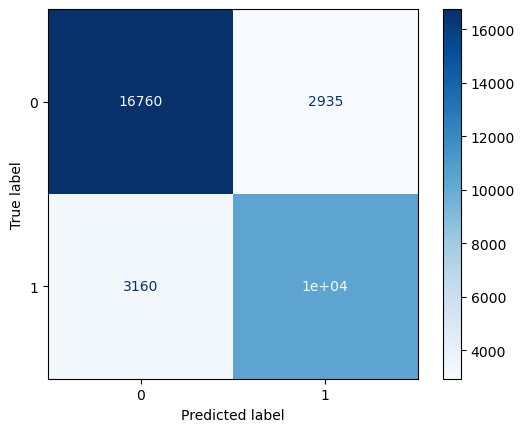

In [37]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues');

## Stacking (default)

In [38]:
stacking_default = StackingClassifier(estimators=[("forest", random_forest_default),
                                                  ("ada", adaboost_default),
                                                  ("gradient", gradient_boosting_default)])
stacking_default.fit(X_train_scaled, y_train)

/home/aurelien/.anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/aurelien/.anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


StackingClassifier(estimators=[('forest', RandomForestClassifier()),
                               ('ada', AdaBoostClassifier()),
                               ('gradient', GradientBoostingClassifier())])

In [39]:
val_scores = cross_val_score(stacking_default, X_test_scaled, y_test, cv=5)

/home/aurelien/.anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/aurelien/.anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/home/aurelien/.anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/aurelien/.anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y

In [40]:
print(val_scores)
np.mean(val_scores)


[0.81677439 0.81286638 0.81857809 0.82200842 0.81343957]


0.8167333668415925

y_pred = stacking_default.predict(X_test_scaled)

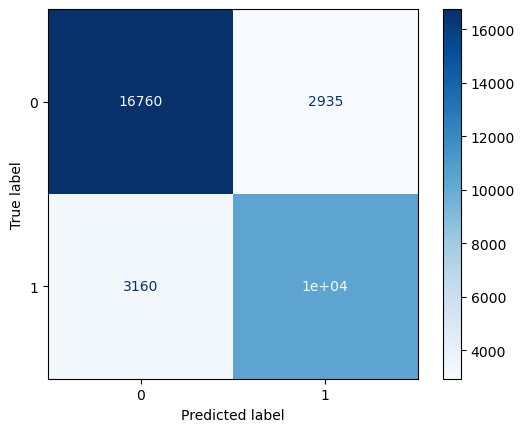

In [41]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues');

***faire tableau accuracy / tp / fp / tn / fn /f1 score etc***

# Grid Search

In [42]:
from sklearn.model_selection import GridSearchCV

## Random Forest

In [ ]:
random_forest_parameters = {
    "n_estimators": (10, 100),
    "criterion": ("gini", "entropy", "log_loss"),
    "max_depth": (None, 10, 20),
    "min_samples_leaf": (1, 2, 10),
}

In [ ]:
random_forest = RandomForestClassifier()
random_forest_best = GridSearchCV(random_forest, random_forest_parameters)

In [ ]:
random_forest_best.fit(X_train_scaled, y_train)

/home/aurelien/.anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/aurelien/.anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/aurelien/.anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/aurelien/.anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ('gini', 'entropy', 'log_loss'),
                         'n_estimators': (10, 100)})

In [ ]:
val_scores_random_forest_best = cross_val_score(random_forest_best, X_test_scaled, y_test, cv=5)

/home/aurelien/.anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/aurelien/.anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/aurelien/.anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/aurelien/.anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:

In [ ]:
print(val_scores_random_forest_best)
np.mean(val_scores_random_forest_best)
print(random_forest_best.best_params_)

[0.8077559  0.80640313 0.81316699 0.81464221 0.80847865]


0.8100893768485165

In [ ]:
y_pred = random_forest_best.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues');

In [ ]:
joblib.dump(random_forest_best.best_estimator_,
            "RandomForest_BestModel_xxxx.joblib")

['RandomForest_BestModel_08101.joblib']

## AdaBoost

In [ ]:
adaboost_parameters = {
    "n_estimators": (50, 100, 500),
    "learning_rate": (0.5, 1.),
}

In [ ]:
adaboostClassifier = AdaBoostClassifier()
adaboost_best = GridSearchCV(adaboostClassifier, adaboost_parameters)

In [ ]:
adaboost_best.fit(X_train_scaled, y_train)

/home/aurelien/.anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/aurelien/.anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/aurelien/.anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/aurelien/.anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expec

GridSearchCV(estimator=AdaBoostClassifier(),
             param_grid={'algorithm': ('SAMME', 'SAMME.R'),
                         'learning_rate': (0.5, 1.0),
                         'n_estimators': (50, 100)})

In [ ]:
val_scores_adabest = cross_val_score(adaboost_best, X_test_scaled, y_test, cv=5)

/home/aurelien/.anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/aurelien/.anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/aurelien/.anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/aurelien/.anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expec

In [ ]:
print(val_scores_adabest)
print(np.mean(val_scores_adabest))
print(adaboost_best.best_params_)

[0.81316699 0.80670374 0.81436946 0.81614552 0.80802766]


0.811682674678521

In [ ]:
y_pred = adaboost_best.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues');

In [ ]:
joblib.dump(adaboost_best.best_estimator_,
            "AdaBoost_BestModel_xxxx.joblib")

['AdaBoost_BestModel_08117.joblib']

## Gradient Boosting

In [60]:
gradient_boosting_parameters = {
    "loss": ("log_loss", "exponential"),
    "learning_rate": (0.1, 0.5),
    "n_estimators": (50, 100),
    "max_depth": (2, 3, 5)
}

In [ ]:
gradientBoostingClassifier = GradientBoostingClassifier()
gradientboost_best = GridSearchCV(gradientBoostingClassifier, gradient_boosting_parameters)

In [ ]:
gradientboost_best.fit(X_train_scaled, y_train)

/home/aurelien/.anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/aurelien/.anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/aurelien/.anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/aurelien/.anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': (0.1, 0.5),
                         'loss': ('log_loss', 'exponential'),
                         'max_depth': (2, 3, 5), 'n_estimators': (50, 100)})

In [63]:
val_scores_gradientbest = cross_val_score(gradientboost_best, X_test_scaled, y_test, cv=5)

/home/aurelien/.anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/aurelien/.anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/aurelien/.anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/aurelien/.anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

KeyboardInterrupt: 

In [ ]:
print(val_scores)
np.mean(val_scores)
print(gradientboost_best.best_params_)

In [ ]:
y_pred = gradientboost_best.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues');

In [ ]:
joblib.dump(gradientboost_best.best_estimator_,
            "GradientBoost_BestModel_xxxx.joblib")

## Stacking of best models

In [ ]:
stacking_best = StackingClassifier(estimators=[("forest", random_forest_best),
                                                  ("ada", adaboost_best),
                                                  ("gradient", gradientboost_best)])
stacking_best.fit(X_train_scaled, y_train)

In [ ]:
val_scores_stacking_best = cross_val_score(stacking_best, X_test_scaled, y_test, cv=5)

In [ ]:
print(val_scores_stacking_best)
np.mean(val_scores_stacking_best)
print(stacking_best.best_params_)

In [ ]:
y_pred = stacking_best.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues');

In [ ]:
joblib.dump(stacking_best.best_estimator_,
            "Stacking_BestModel_xxxx.joblib")